In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
weather_data = r'C:\Users\JosephBream\OneDrive - Smart Managed Solutions\Documents\Weather Station Data.xlsx'

# Read all sheets into a dictionary of DataFrames
dfs = pd.read_excel(weather_data, sheet_name=None)

# Iterate over each sheet and write it to a CSV file
# for sheet_name, df in dfs.items():
#     csv_filename = f"{sheet_name}.csv"  # Construct the CSV filename
#     df.to_csv(csv_filename, index=False)  # Write DataFrame to CSV without index

#     print(f"Converted '{sheet_name}' to CSV: {csv_filename}")

In [67]:
WS_Data = pd.read_csv('Data.csv')
WS_Stations = pd.read_csv('Stations.csv')

In [86]:
WS_Data.head() # Quick look at the data

,Timestamp,03770H150,03770C150,EGLLH150,EGLLC150,EGLCH150,EGLCC150
0,2010-01-01,375.7,0.0,397.5,0.0,385.6,0.0
1,2010-02-01,292.9,0.0,307.8,0.0,305.8,0.0
2,2010-03-01,228.5,0.1,246.5,0.3,241.7,0.1
3,2010-04-01,134.7,10.0,147.1,9.7,150.8,7.9
4,2010-05-01,104.7,28.6,114.7,31.5,116.5,23.0


In [22]:
WS_Stations.head() #  A look at the stations records

,Station ID,Station Name,Station Longitude,Station Latitude,Station City,% Estimated
0,03770,London St James Park,0.13W,51.50N,London,0.020
1,EGLL,"London, GB",0.45W,51.48N,London,0.002
2,EGLC,London City Airport,NaN,NaN,London,0.030


In [166]:
# Some data cleaning
WS_Data['Timestamp'] = pd.to_datetime(WS_Data['Timestamp'])

Text(0, 0.5, 'Heating degree days')

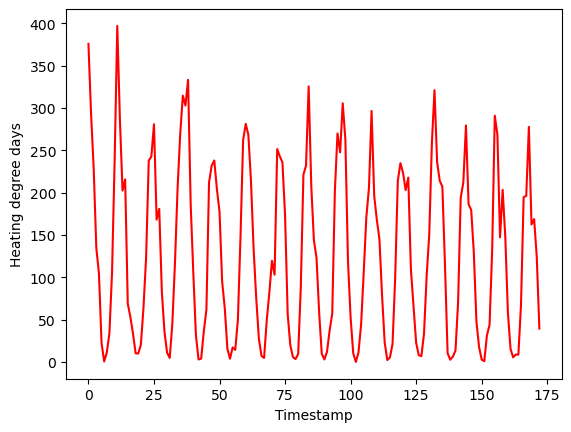

In [87]:
Heating_Days = WS_Data['03770H150']
axes = Heating_Days.plot(kind = "line",
                  color = "red")

axes.set_xlabel("Timestamp")
axes.set_ylabel("Heating degree days")

In [142]:
timestamplist = []
for i in range(0,173,24):
    timestamplist.append(i)

print(timestamplist)

[0, 24, 48, 72, 96, 120, 144, 168]


Text(0, 0.5, 'Heating degree days')

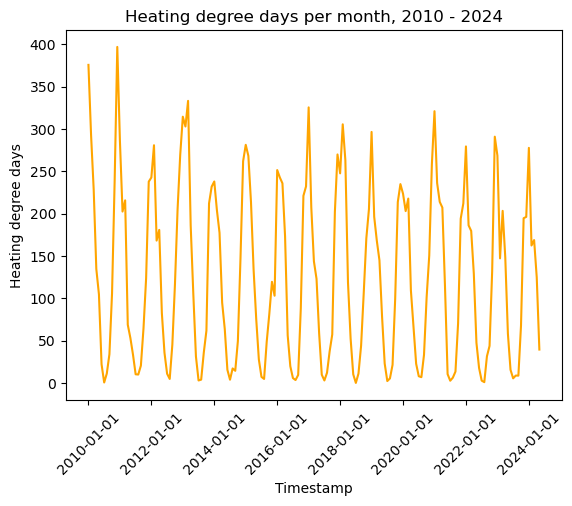

In [143]:
## HEATING DEGREE DAY PER MONTH ##
x = WS_Data['Timestamp']
y = WS_Data['03770H150']
chart = plt.plot(x, y, color="orange")
plt.title("Heating degree days per month, 2010 - 2024")
plt.xlabel("Timestamp")
plt.xticks(timestamplist,rotation=45)
plt.ylabel("Heating degree days")

Text(0, 0.5, 'Cooling degree days')

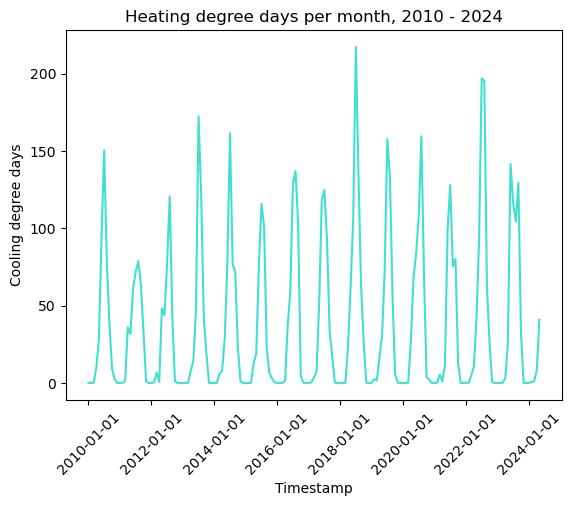

In [145]:
## COOLING DEGREE DAY PER MONTH ##
x = WS_Data['Timestamp']
y = WS_Data['03770C150']
chart = plt.plot(x, y, color="turquoise")
plt.title("Heating degree days per month, 2010 - 2024")
plt.xlabel("Timestamp")
plt.xticks(timestamplist,rotation=45)
plt.ylabel("Cooling degree days")

In [215]:
# Add a column displaying the year
WS_Data['Year'] = WS_Data["Timestamp"].dt.year

# Grouping the data by year
WS_Data_ByYear = WS_Data.groupby(['Year']).mean()

Text(0, 0.5, 'Heating degree days')

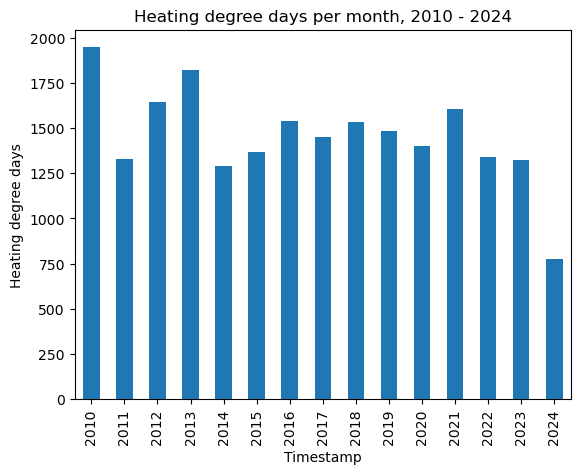

In [193]:
## HEATING DEGREE DAY PER YEAR ## (Using Pandas plot)
HDDsperYear = WS_Data.groupby([years])["03770H150"].sum()
HDDsperYear.plot(kind='bar')

In [ ]:
## HEATING DEGREE DAYS PER YEAR ## (Using Matplotlib)

chart = plt.bar(x, y, color="green")
plt.title("Heating degree days per month, 2010 - 2024")
plt.xlabel("Timestamp")
# plt.xticks(timestamplist,rotation=45)
plt.ylabel("Heating degree days")

In [214]:
## HEATING DEGREE DAY PER YEAR ## (Using Pandas plot)
WS_Data_ByYear = WS_Data.groupby(['Year']).mean()
print(HDDsperYear)

               Timestamp   03770H150  03770C150    EGLLH150   EGLLC150  \
Year                                                                     
2010 2010-06-16 12:00:00  162.216667  34.433333  175.433333  34.016667   
2011 2011-06-16 12:00:00  110.558333  31.458333  122.391667  30.625000   
2012 2012-06-16 08:00:00  136.925000  28.441667  148.100000  27.225000   
2013 2013-06-16 12:00:00  151.825000  35.208333  160.350000  36.533333   
2014 2014-06-16 12:00:00  107.366667  37.941667  115.158333  36.841667   
2015 2015-06-16 12:00:00  113.783333  29.641667  122.483333  28.216667   
2016 2016-06-16 08:00:00  128.316667  39.108333  139.991667  36.525000   
2017 2017-06-16 12:00:00  120.825000  37.366667  128.191667  36.216667   
2018 2018-06-16 12:00:00  127.941667  52.633333  137.266667  50.766667   
2019 2019-06-16 12:00:00  123.658333  39.641667  132.683333  39.525000   
2020 2020-06-16 08:00:00  116.675000  43.483333  126.291667  42.458333   
2021 2021-06-16 12:00:00  133.525000  